In [1]:
import pickle
import pandas as pd

def load(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# Spearman data
baseline_sp = load("single_run_1_results_sp.pkl")
clades_sp   = load("single_run_2_results_sp.pkl")

# RMSE data
baseline_rmse = load("model1_user_name_norun_rmse.pkl")
clades_rmse   = load("model2_user_name_norun_rmse.pkl")

# Extract rmse DFs
baseline_rmse_delta_logit = baseline_rmse["rmse_delta_logit"]  # tissue, rmse_delta_logit
baseline_rmse_psi         = baseline_rmse["rmse_psi"]

clades_rmse_delta_logit = clades_rmse["rmse_delta_logit"]
clades_rmse_psi         = clades_rmse["rmse_psi"]


In [2]:
def make_metric_df(base_df, cl_df, base_col, cl_col, metric_name):
    df1 = base_df[["tissue", base_col]].rename(columns={base_col: "value"})
    df2 = cl_df[["tissue", cl_col]].rename(columns={cl_col: "value"})

    df1["Model"] = "Baseline"
    df2["Model"] = "CLADES"

    df = pd.concat([df1, df2], ignore_index=True)
    df["metric_label"] = metric_name
    return df

# Row 1: Δlogit ψ Spearman
df_row1 = make_metric_df(
    baseline_sp, clades_sp,
    "spearman_rho_delta_psi", "spearman_rho_delta_psi",
    "Δlogit ψ Spearman"
)

# Row 2: ψ Spearman
df_row2 = make_metric_df(
    baseline_sp, clades_sp,
    "spearman_rho_psi", "spearman_rho_psi",
    "ψ Spearman"
)

# Row 3: RMSE(logit ψ)
df_row3 = make_metric_df(
    baseline_rmse_delta_logit, clades_rmse_delta_logit,
    "rmse_delta_logit", "rmse_delta_logit",
    "RMSE logit ψ"
)

# Row 4: RMSE(ψ)
df_row4 = make_metric_df(
    baseline_rmse_psi, clades_rmse_psi,
    "rmse_psi", "rmse_psi",
    "RMSE ψ"
)


In [3]:
# Combine all rows for one consistent ordering
all_df_for_order = pd.concat([df_row1, df_row2, df_row3, df_row4], ignore_index=True)

tissue_order = (
    all_df_for_order.groupby("tissue")["value"]
    .mean()
    .sort_values()
    .index
    .tolist()
)


In [45]:
from plotnine import *
import time

def make_plot(
    df,
    ylabel,
    outname,
    outdir,
    ylimits=None,
    yticks=None,
    show_xlabel=True,
    width=16,
    height=4.5,
    legend_position=(0.02, 0.98)
):
    df = df.copy()
    
    # consistent ordering
    df["tissue"] = pd.Categorical(df["tissue"], categories=tissue_order, ordered=True)
    df["Model"]  = pd.Categorical(df["Model"], categories=["Baseline", "CLADES"], ordered=True)
    df["tissue"] = df["tissue"].str.title()

    # Build plot
    p = (
        ggplot(df, aes("tissue", "value", fill="Model"))
        + geom_bar(stat="identity", position=position_dodge(width=0.75), width=0.7)
        + scale_fill_manual(values={"Baseline": "#c0c0c0", "CLADES": "#4daf4a"})
        + scale_x_discrete(expand=(0.02, 0.02))
        + labs(
            x="Cell type" if show_xlabel else "",
            y=ylabel,
            fill=None
        )
        + theme_bw()
        + theme(
            figure_size=(width, height),
            legend_position=legend_position,
            legend_justification=(0, 1),
            legend_title=element_blank(),
            legend_background=element_blank(),
            legend_text=element_text(size=18),

            axis_text_x=(
                element_text(size=14, angle=90, ha="center", va="top")
                if show_xlabel else element_blank()
            ),
            axis_text_y=element_text(size=14),
            axis_title_x=element_text(size=25, weight="bold") if show_xlabel else element_blank(),
            axis_title_y=element_text(size=25, weight="bold"),

            panel_border=element_blank(),
            panel_grid_major_y=element_line(color="#dddddd"),
            panel_grid_major_x=element_blank(),
            panel_grid_minor=element_blank(),
        )
    )

    # y-axis limits
    if ylimits is not None:
        p += coord_cartesian(ylim=ylimits)

    # custom ticks
    if yticks is not None:
        p += scale_y_continuous(breaks=yticks)

    # save
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    base = f"{outdir}/{outname}_{timestamp}"

    for fmt in ["png", "pdf", "svg"]:
        p.save(
            filename=f"{base}.{fmt}",
            dpi=300,
            width=width,
            height=height,
            verbose=False
        )
        print("Saved:", f"{base}.{fmt}")

    p.show()
    return p


Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_a_delta_logit_spearman_20251116_000808.png
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_a_delta_logit_spearman_20251116_000808.pdf
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_a_delta_logit_spearman_20251116_000808.svg


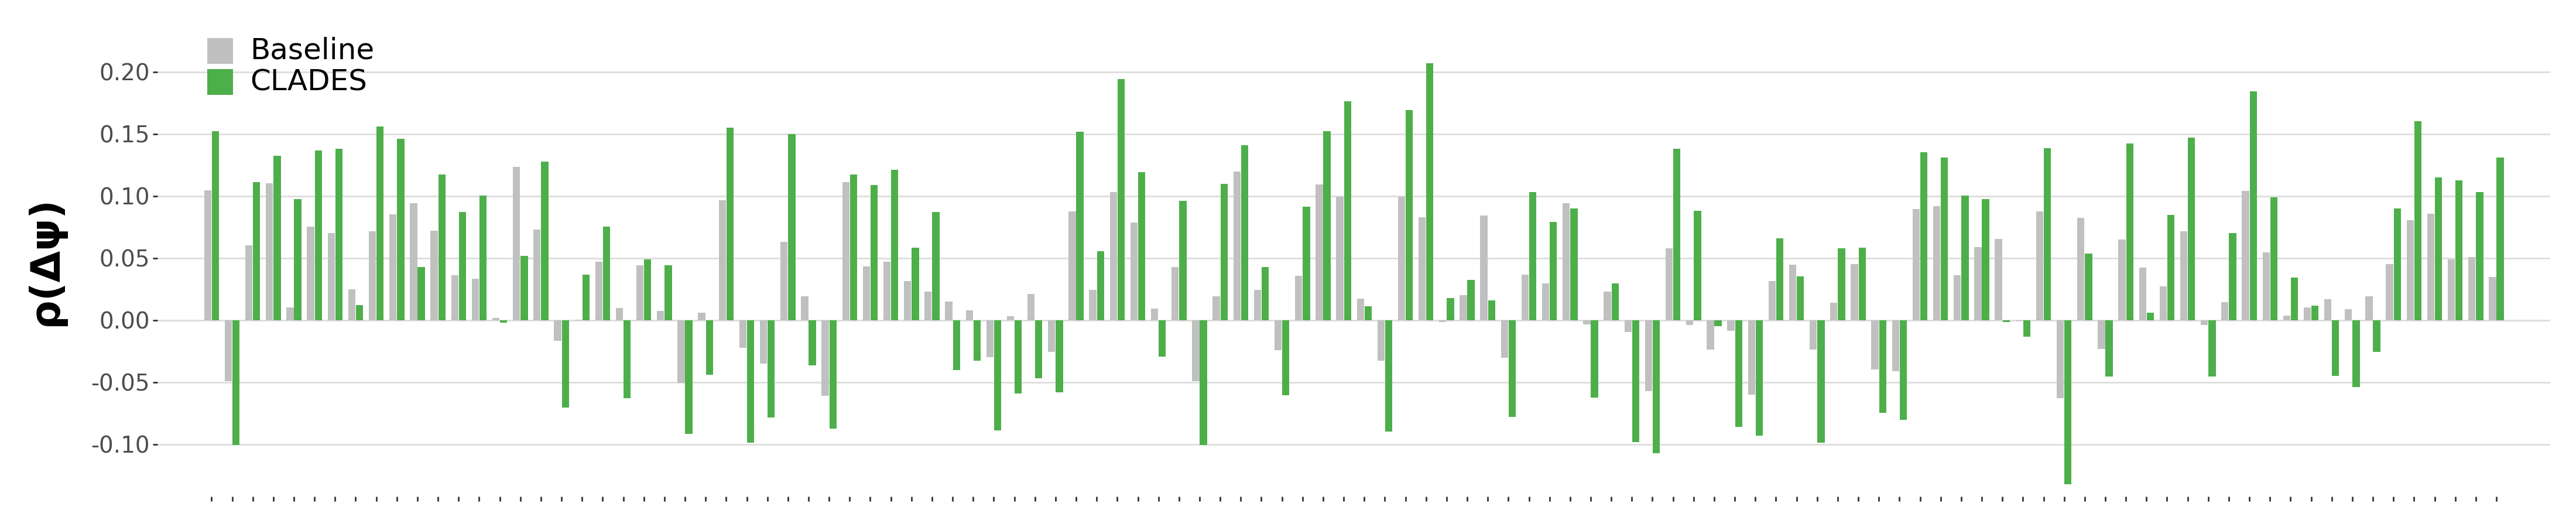

Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_b_psi_spearman_20251116_000812.png
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_b_psi_spearman_20251116_000812.pdf
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_b_psi_spearman_20251116_000812.svg


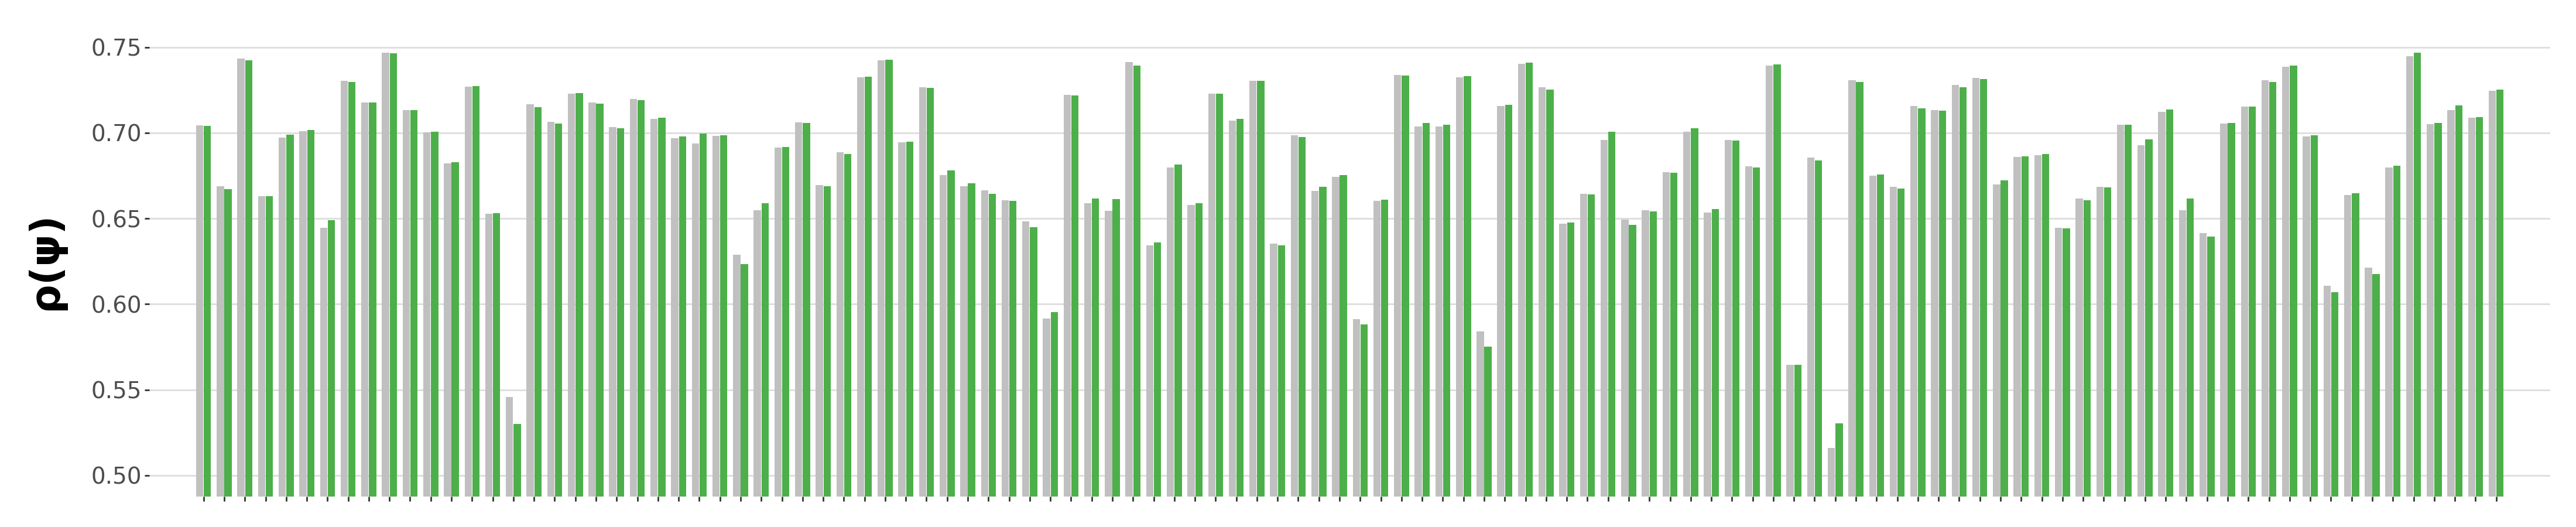

Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_c_rmse_logit_20251116_000814.png
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_c_rmse_logit_20251116_000814.pdf
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_c_rmse_logit_20251116_000814.svg


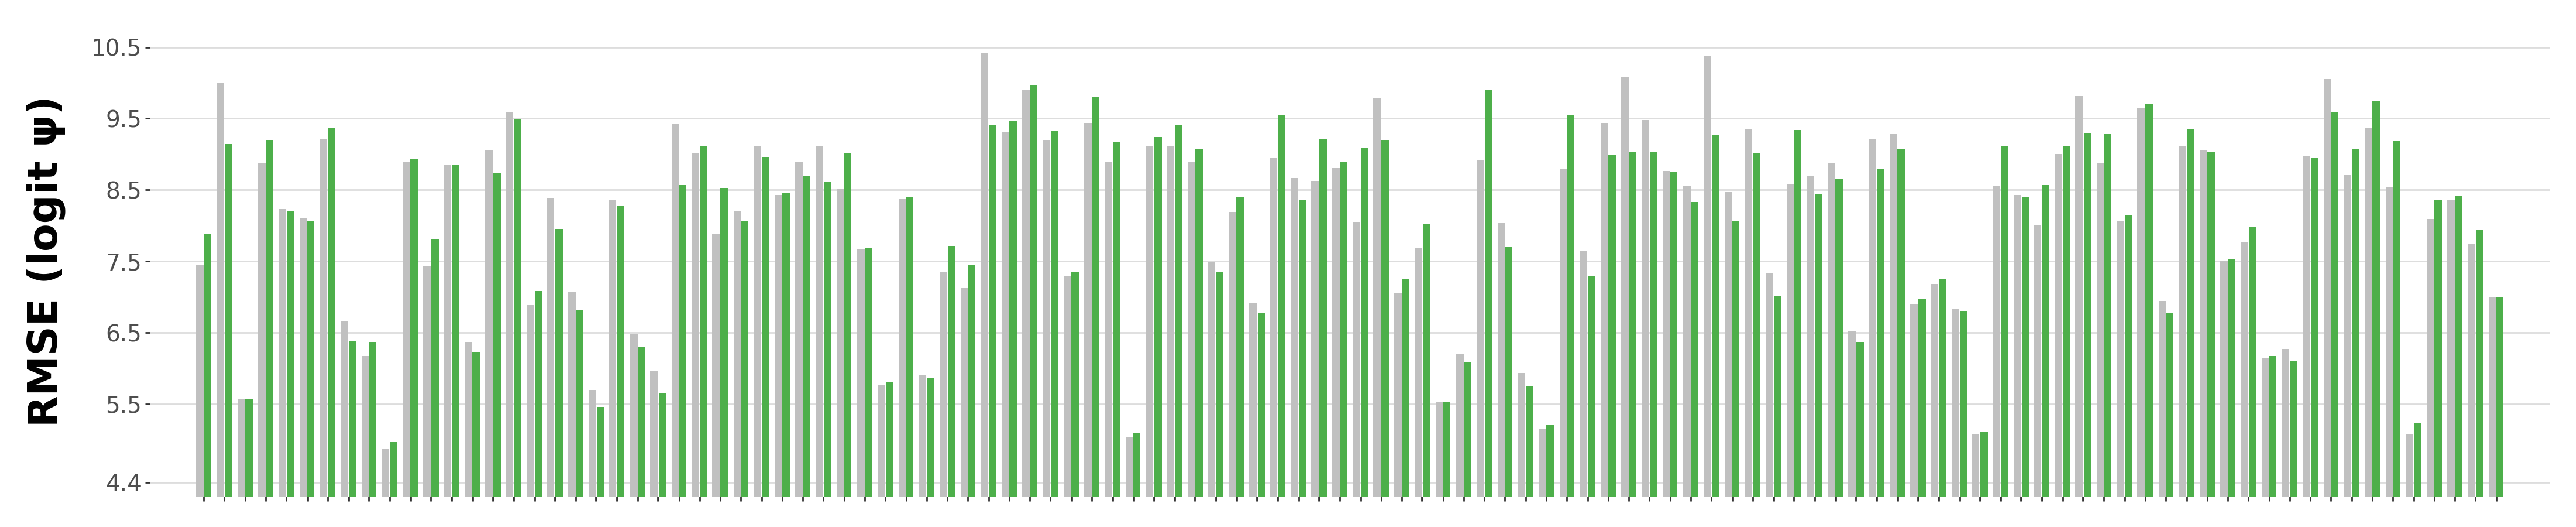

Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_d_rmse_psi_20251116_000817.png
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_d_rmse_psi_20251116_000817.pdf
Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/TS_d_rmse_psi_20251116_000817.svg


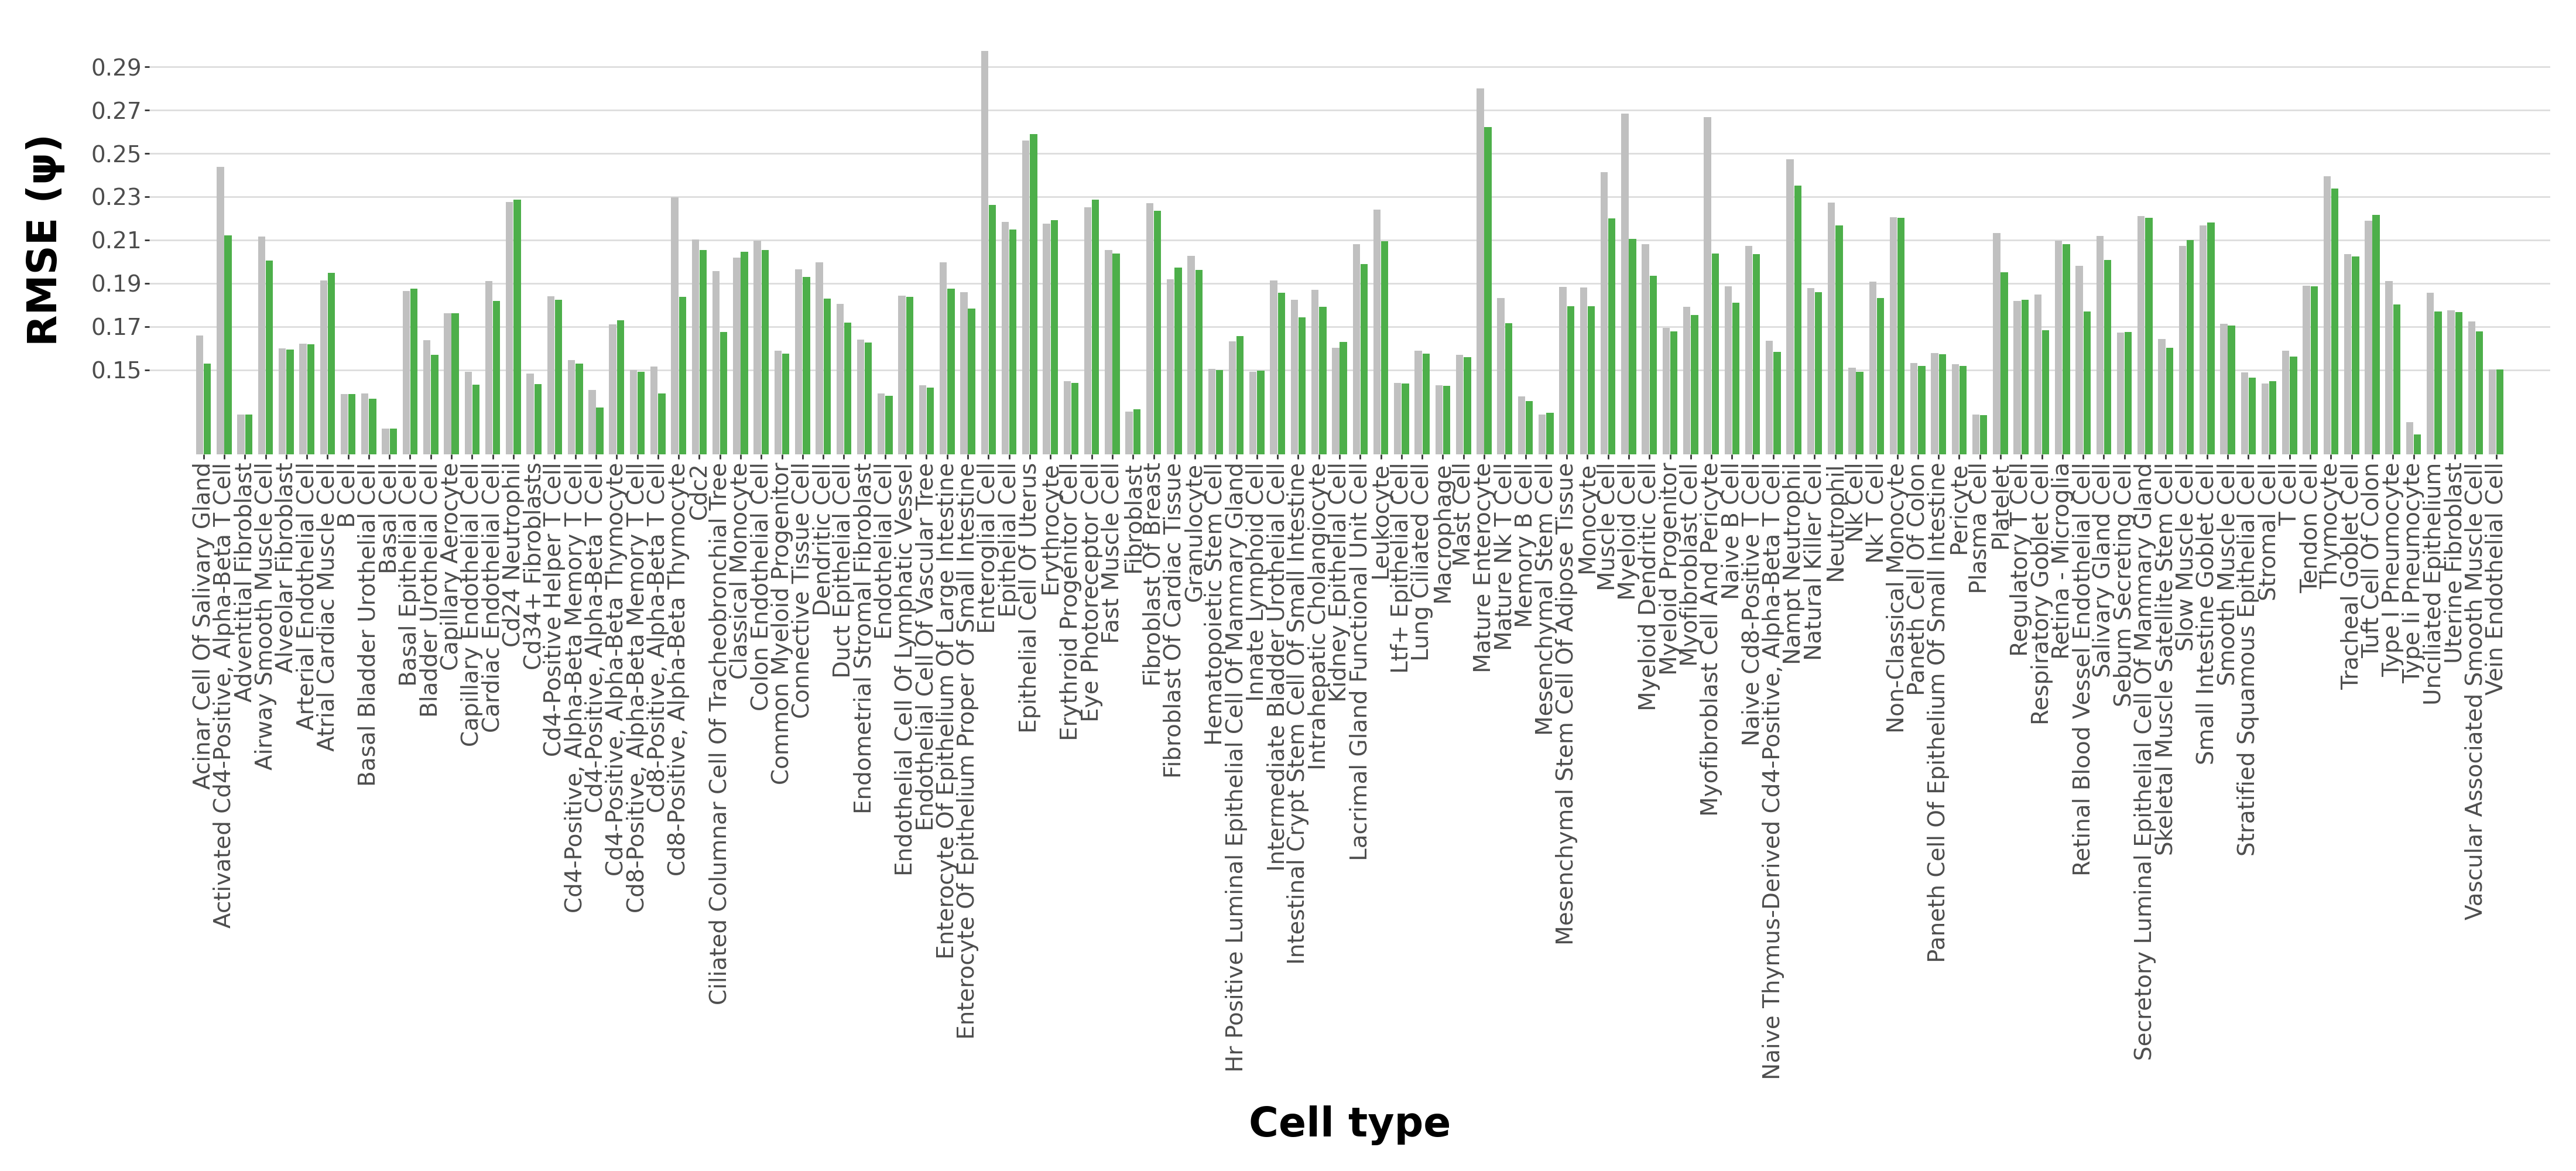

In [46]:
outdir = "/gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures"

p_a = make_plot(
    df=df_row1,
    ylabel="ρ(Δψ)",
    outname="TS_a_delta_logit_spearman",
    outdir=outdir,
    ylimits=(-0.125, 0.22),
    yticks=[ -0.10, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2],
    show_xlabel=False,
    width=22,
    height=4.5
)

p_b = make_plot(
    df=df_row2,
    ylabel="ρ(ψ)",
    outname="TS_b_psi_spearman",
    outdir=outdir,
    ylimits=(0.5, 0.75),
    yticks=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75],
    show_xlabel=False,
    width=22,
    height=4.5,
    legend_position='none'
)


p_c = make_plot(
    df=df_row3,
    ylabel="RMSE (logit ψ)",
    outname="TS_c_rmse_logit",
    outdir=outdir,
    ylimits=(4.5, 10.5),
    yticks=[4.4, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5],
    show_xlabel=False,
    width=22,
    height=4.5,
    legend_position='none'
)


p_d = make_plot(
    df=df_row4,
    ylabel="RMSE (ψ)",
    outname="TS_d_rmse_psi",
    outdir=outdir,
    ylimits=(0.12, 0.3),
    yticks=[0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29],
    show_xlabel=True,
    width=22,      # <<<< WIDE FIGURE FIX
    height=10.0,
    legend_position='none'
)




In [ ]:
# def plot_all_four(df1, df2, df3, df4, outdir):
#     p1 = styled_row(df1, "ρ(Δlogit ψ)", False)
#     p2 = styled_row(df2, "ρ(ψ)", False)
#     p3 = styled_row(df3, "RMSE logit ψ", False)
#     p4 = styled_row(df4, "RMSE ψ", True)

#     fig = plt.figure(figsize=(16, 18))
#     gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])

#     for i, p in enumerate([p1, p2, p3, p4]):
#         ax = fig.add_subplot(gs[i, 0])
#         img = p.draw()
#         ax.imshow(img)
#         ax.axis("off")

#     timestamp = time.strftime("%Y%m%d_%H%M%S")
#     base = f"{outdir}/fig_CellType_AllMetrics_{timestamp}"

#     # for fmt in ["png", "pdf", "svg"]:
#     #     fig.savefig(f"{base}.{fmt}", dpi=300, bbox_inches="tight")
#     #     print("Saved:", f"{base}.{fmt}")

#     plt.close(fig)


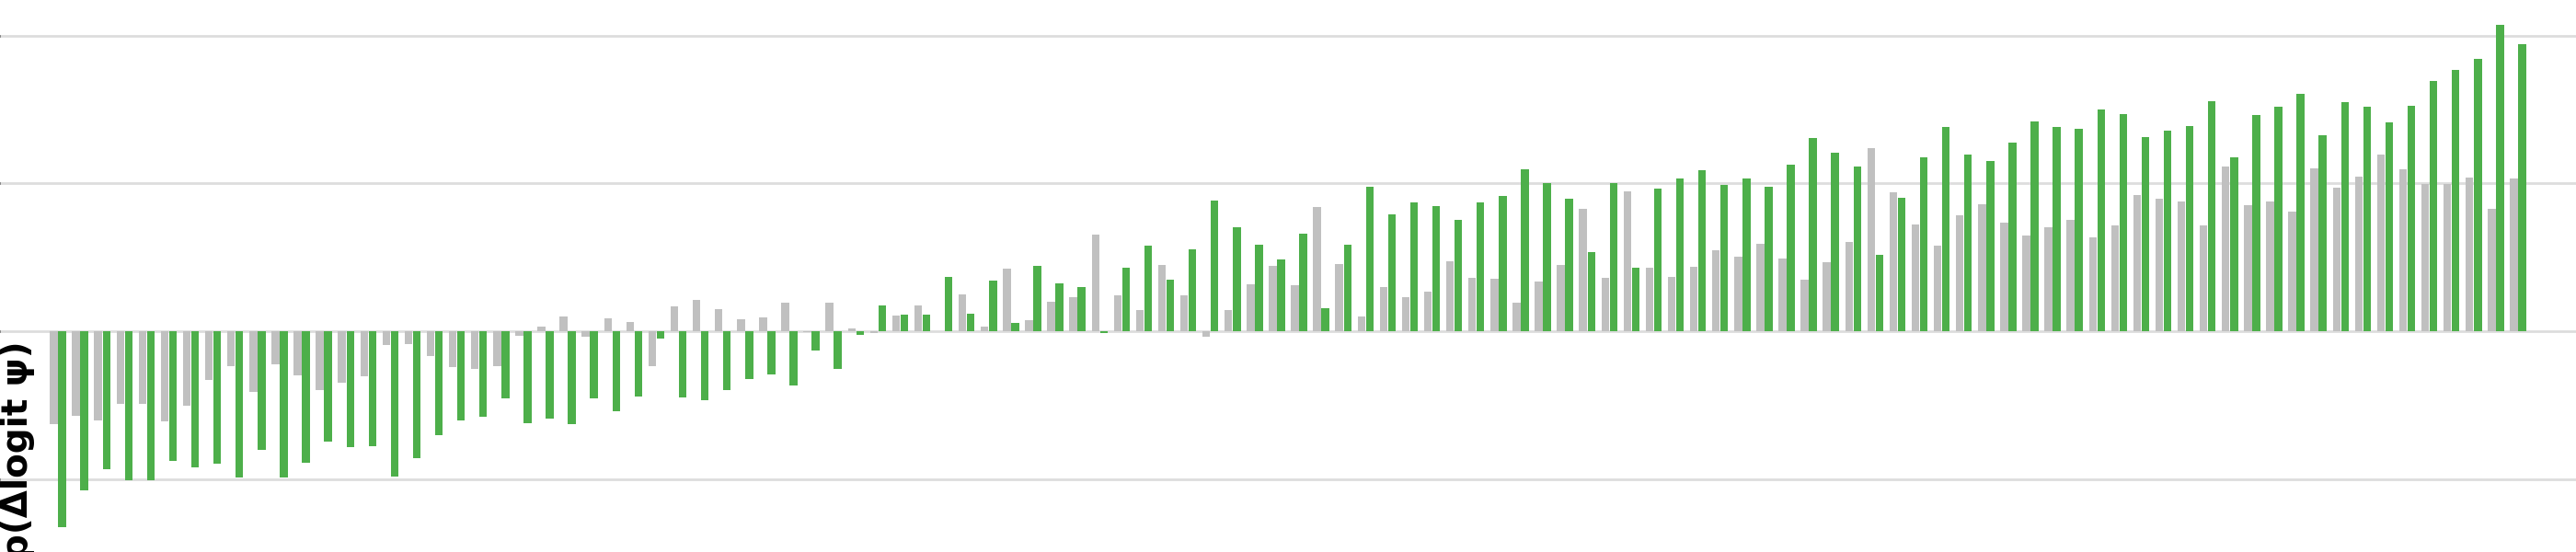

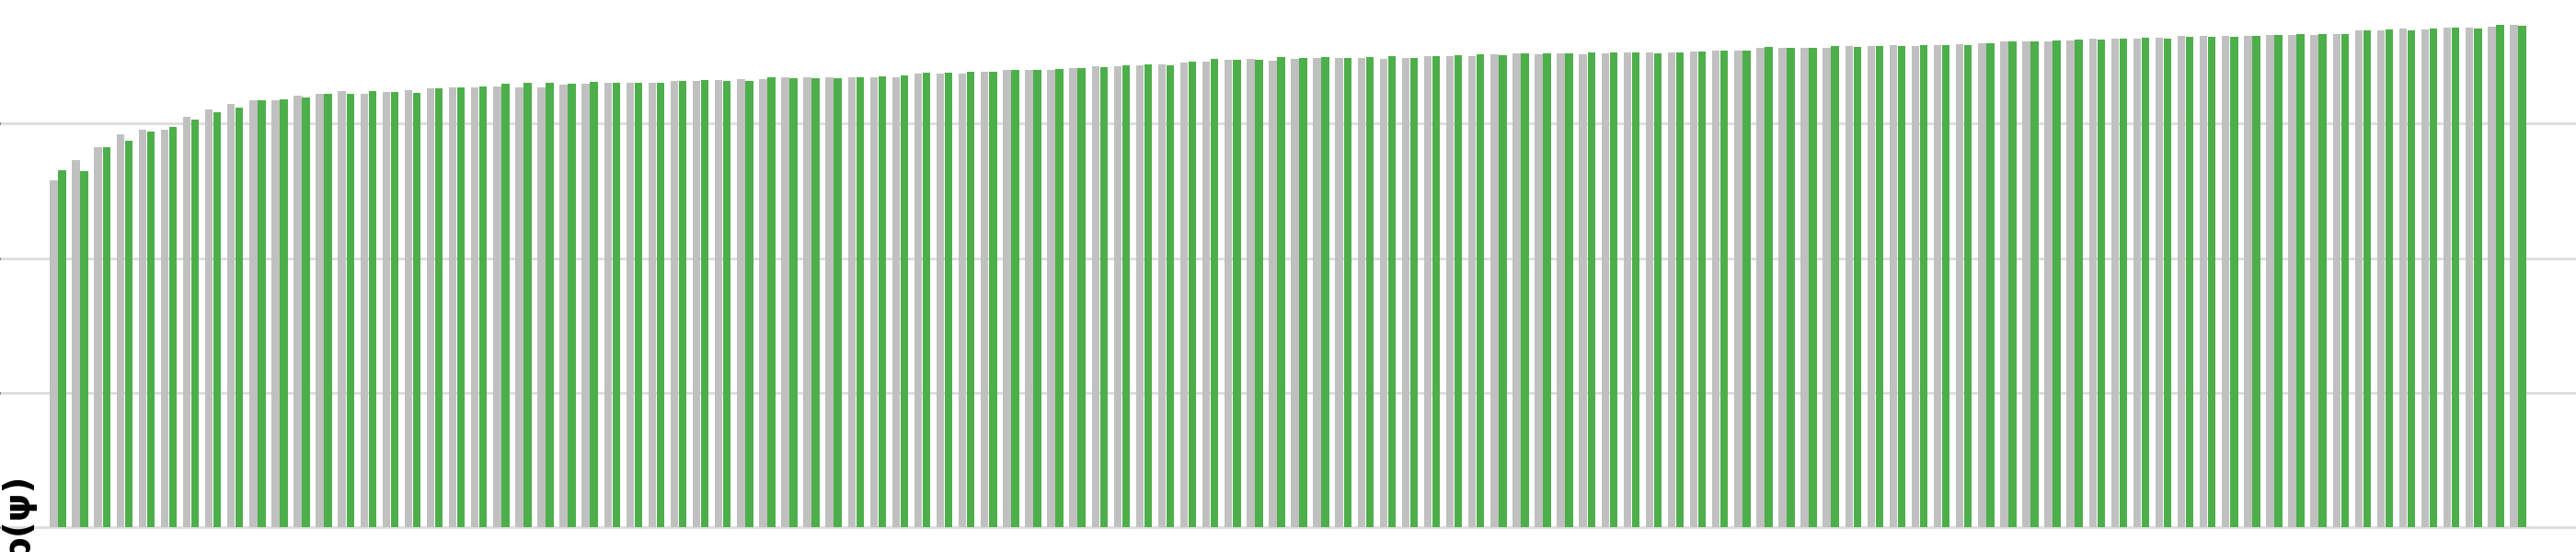

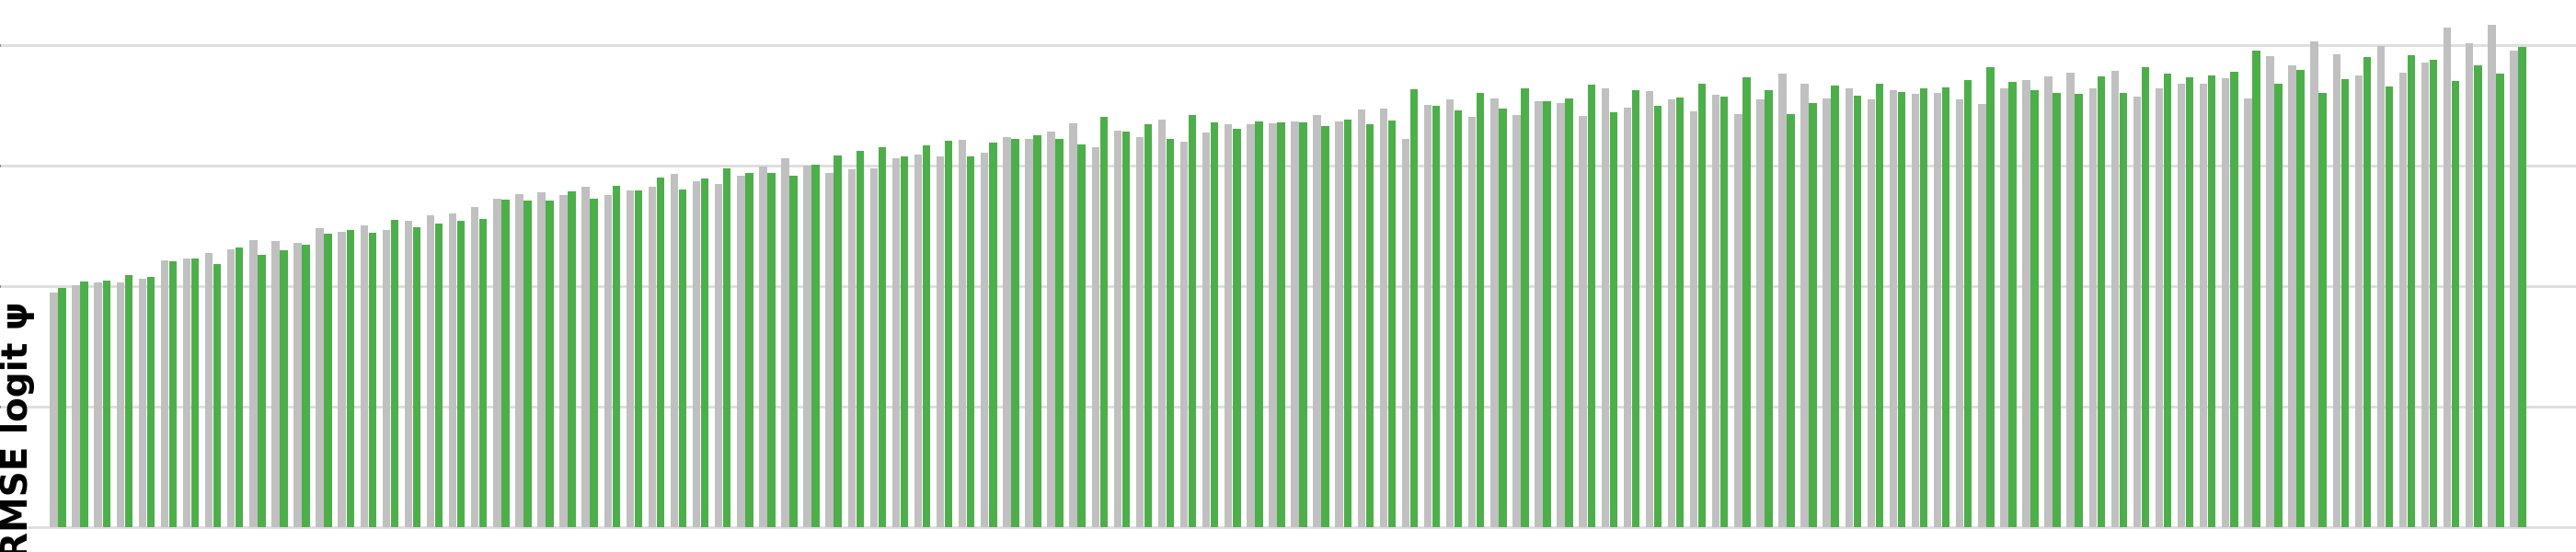

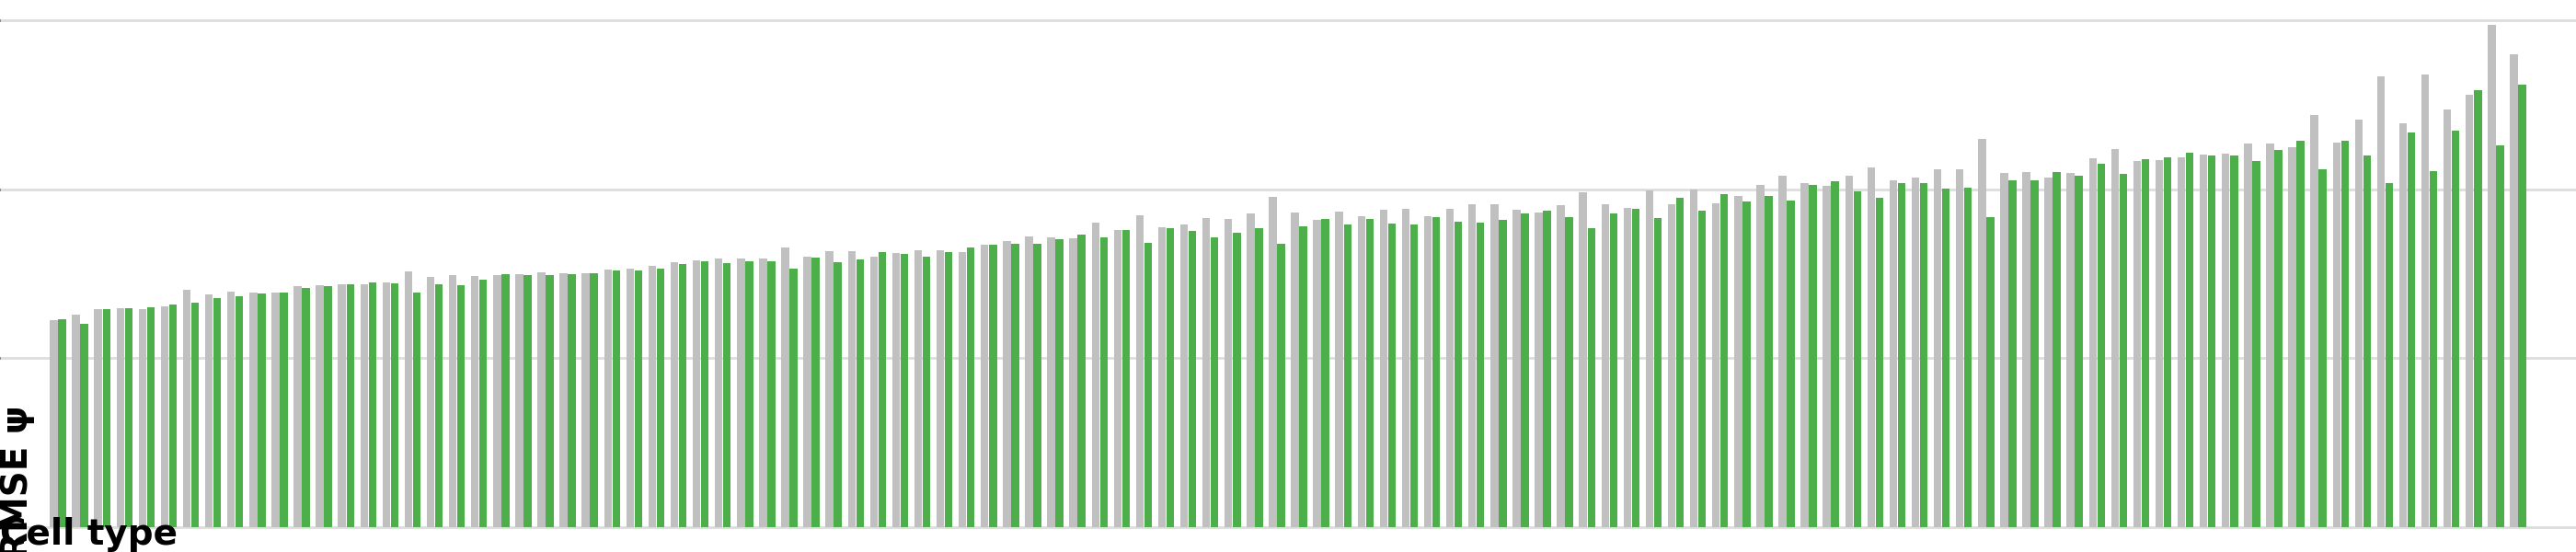

TypeError: Image data of dtype object cannot be converted to float

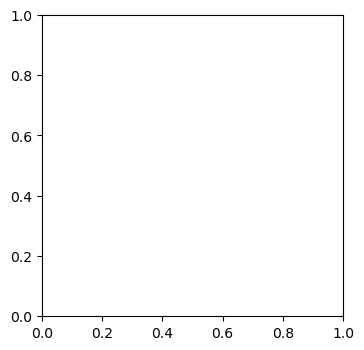

In [ ]:
# outdir = "/gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures"

# plot_all_four(df_row1, df_row2, df_row3, df_row4, outdir)
